In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# some nice settings
pd.set_option('precision', 5)
sns.set_palette('Set2', 14)

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [16]:
countries = ['Columbia', 'Venezuela', 'Guyana', 'Suriname', 'French_Guiana', 'Brazil', 'Uruguay','Argentina', 'Chile', 'Paraguay', 'Bolivia', 'Peru', 'Ecuador']

In [17]:
countries = sorted(countries)
print (countries)

['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Columbia', 'Ecuador', 'French_Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']


In [10]:
adjacency = np.array([[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                      [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                      [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                      [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
                      [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                      [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                      [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]])

In [11]:
assert np.all(adjacency.T == adjacency)

In [12]:
adjacency[0, :]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [13]:
adjacency[0, :].astype(float)/adjacency[0, :].sum()

array([0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ])

In [15]:
A = adjacency.astype(float)

# normalize by row
for i in range(len(adjacency)):
    A[i, :] /= A[i, :].sum()

np.set_printoptions(precision=2)
print (A)

[[0.   0.2  0.2  0.2  0.   0.   0.   0.   0.2  0.   0.   0.2  0.  ]
 [0.2  0.   0.2  0.2  0.   0.   0.   0.   0.2  0.2  0.   0.   0.  ]
 [0.1  0.1  0.   0.   0.1  0.   0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]
 [0.33 0.33 0.   0.   0.   0.   0.   0.   0.   0.33 0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.25]
 [0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.5  0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.   0.33 0.   0.   0.   0.   0.   0.   0.   0.33 0.   0.33]
 [0.33 0.33 0.33 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.2  0.2  0.2  0.2  0.2  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.33 0.   0.   0.   0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.33 0.   0.33 0.   0.   0.33 0.   0.   0.   0.   0.  ]]


In [18]:
chile_idx = 3
pd.Series(A[chile_idx], index=countries)

Argentina        0.33333
Bolivia          0.33333
Brazil           0.00000
Chile            0.00000
Columbia         0.00000
Ecuador          0.00000
French_Guiana    0.00000
Guyana           0.00000
Paraguay         0.00000
Peru             0.33333
Suriname         0.00000
Uruguay          0.00000
Venezuela        0.00000
dtype: float64

In [19]:
x = np.zeros((len(countries), 1), dtype=float)
x[chile_idx] = 1
x

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [20]:
probs = np.dot(x.T, A)
pd.Series(probs.ravel(), index=countries)

Argentina        0.33333
Bolivia          0.33333
Brazil           0.00000
Chile            0.00000
Columbia         0.00000
Ecuador          0.00000
French_Guiana    0.00000
Guyana           0.00000
Paraguay         0.00000
Peru             0.33333
Suriname         0.00000
Uruguay          0.00000
Venezuela        0.00000
dtype: float64

In [21]:
probs = np.dot(x.T, np.dot(A, A))
pd.Series(probs.ravel(), index=countries)

Argentina        0.06667
Bolivia          0.13333
Brazil           0.20000
Chile            0.20000
Columbia         0.06667
Ecuador          0.06667
French_Guiana    0.00000
Guyana           0.00000
Paraguay         0.13333
Peru             0.06667
Suriname         0.00000
Uruguay          0.06667
Venezuela        0.00000
dtype: float64

In [22]:
def probability_vector(t):
    """ probability of being in any country on day t """
    probs = np.dot(x.T, np.linalg.matrix_power(A, t))
    return pd.Series(probs.ravel(), index=countries)

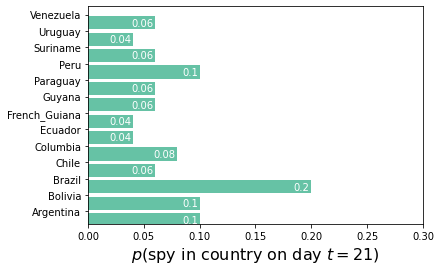

In [24]:
# calculate the probabilities for 3 weeks out
probs = probability_vector(3*7)

# make a bar plot
pos = np.arange(len(countries))
rects = plt.barh(pos, probs)

# label the bars with their actual values
# see: http://matplotlib.org/examples/pylab_examples/barchart_demo2.html
for i, rect in enumerate(rects):
    plt.text(rect.get_width() - 0.0015,
             rect.get_y() + rect.get_height()/2.0,
             str(round(probs[i], 4)),
             color='white',
             horizontalalignment='right',
             verticalalignment='center')

# annotate the plot
plt.yticks(pos + 0.5, countries)
plt.xlim(0, 0.3)
plt.ylim(-0.25, 13)
plt.xlabel(r'$p(\mathrm{spy\ in\ country\ on\ day\ }t=21)$', fontsize=16)
plt.show()

In [29]:
initial_state = {0: probability_vector(0)}
comparison = pd.DataFrame(initial_state)

days = [1, 2, 3, 5, 6, 7, 14, 21, 30, 60, 90, 180, 365]
for t in days:
    comparison[t] = probability_vector(t)
    
comparison

,0,1,2,3,5,6,7,14,21,30,60,90,180,365
Argentina,0.0,0.33333,0.06667,0.19111,0.13266,0.10471,0.11207,0.10042,0.10003,0.10,0.10,0.10,0.10,0.10
Bolivia,0.0,0.33333,0.13333,0.15778,0.12078,0.11170,0.10859,0.10048,0.10003,0.10,0.10,0.10,0.10,0.10
Brazil,0.0,0.00000,0.20000,0.14778,0.18248,0.19378,0.19328,0.19967,0.19998,0.20,0.20,0.20,0.20,0.20
Chile,1.0,0.00000,0.20000,0.05333,0.06400,0.07495,0.06359,0.06040,0.06002,0.06,0.06,0.06,0.06,0.06
Columbia,0.0,0.00000,0.06667,0.06667,0.07566,0.07776,0.07837,0.07993,0.08000,0.08,0.08,0.08,0.08,0.08
Ecuador,0.0,0.00000,0.06667,0.03000,0.03782,0.04318,0.03975,0.04007,0.04000,0.04,0.04,0.04,0.04,0.04
French_Guiana,0.0,0.00000,0.00000,0.02000,0.02961,0.03194,0.03510,0.03969,0.03998,0.04,0.04,0.04,0.04,0.04
Guyana,0.0,0.00000,0.00000,0.02000,0.04232,0.04828,0.05219,0.05954,0.05997,0.06,0.06,0.06,0.06,0.06
Paraguay,0.0,0.00000,0.13333,0.06000,0.06398,0.06893,0.06266,0.06025,0.06001,0.06,0.06,0.06,0.06,0.06
Peru,0.0,0.33333,0.06667,0.16333,0.12130,0.10156,0.10773,0.10027,0.10002,0.10,0.10,0.10,0.10,0.10


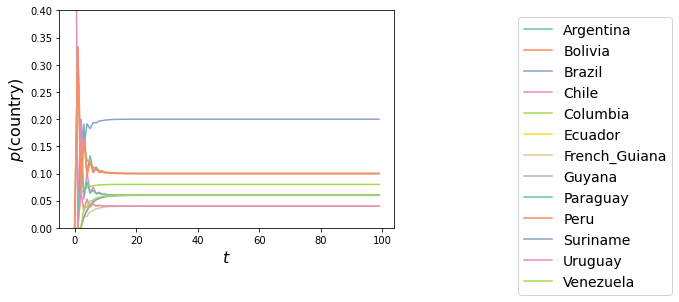

In [26]:
ts = np.arange(100)

for i, country in enumerate(countries):
    plt.plot(ts, [probability_vector(t)[i] for t in ts], label=country)

plt.xlabel('$t$', fontsize=16)
plt.ylabel('$p(\mathrm{country})$', fontsize=16)
plt.ylim(0, 0.4)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize=14)
plt.show()

In [27]:
np.linalg.matrix_power(A, 3*7)

array([[0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 0.06, 0.06, 0.1 , 0.06,
        0.04, 0.06],
       [0.1 , 0.1 , 0.2 , 0.06, 0.08, 0.04, 0.04, 

In [28]:
pd.Series(adjacency.sum(axis=1), index=countries)

Argentina         5
Bolivia           5
Brazil           10
Chile             3
Columbia          4
Ecuador           2
French_Guiana     2
Guyana            3
Paraguay          3
Peru              5
Suriname          3
Uruguay           2
Venezuela         3
dtype: int32